# SAS Multinomial LR Project - Multicollinearity Check
Jiyoung Kim (110075)

In [21]:
# Import packages
import pandas as pd
import numpy as np
#import sklearn import preprocessing

## For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Set font size for plotting
sns.set(font_scale=1.2)

In [22]:
# Load dataset
ess = pd.read_csv("/Users/sahilsingh/Downloads/ess_final.csv", na_values=' ') 

ess.head()

,cntry,stfeco,stfgov,stfedu,stfhlth,agea,source_income,Y
0,BG,1,2,1,2,76,Social Grants,3
1,BG,1,1,3,1,43,Capital Incom,2
2,BG,2,1,1,1,50,Labour Income,1
3,BG,1,1,1,1,51,Labour Income,1
4,BG,1,3,1,1,70,Labour Income,1


In [23]:
ess = ess.drop('source_income', axis=1)

In [24]:
ess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30115 entries, 0 to 30114
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    30115 non-null  object
 1   stfeco   30115 non-null  int64 
 2   stfgov   30115 non-null  int64 
 3   stfedu   30115 non-null  int64 
 4   stfhlth  30115 non-null  int64 
 5   agea     30115 non-null  int64 
 6   Y        30115 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.6+ MB


In [25]:
# Wrong data type revision
ess["stfeco"] = ess["stfeco"].astype(str)
ess["stfgov"] = ess["stfgov"].astype(str)
ess["stfhlth"] = ess["stfhlth"].astype(str)
ess["stfedu"] = ess["stfedu"].astype(str)
ess.dtypes

cntry      object
stfeco     object
stfgov     object
stfedu     object
stfhlth    object
agea        int64
Y           int64
dtype: object

###**Multicollinearity / Correlation**

Checking correlation between variables, drawing correlation matrix using Cramer's V coefficient.




#### **Cramer's V correlation matrix for categorical variables**

/Users/sahilsingh/Documents/SAS-Multinomial-Logistic-Regression-Project/cat_corr.png

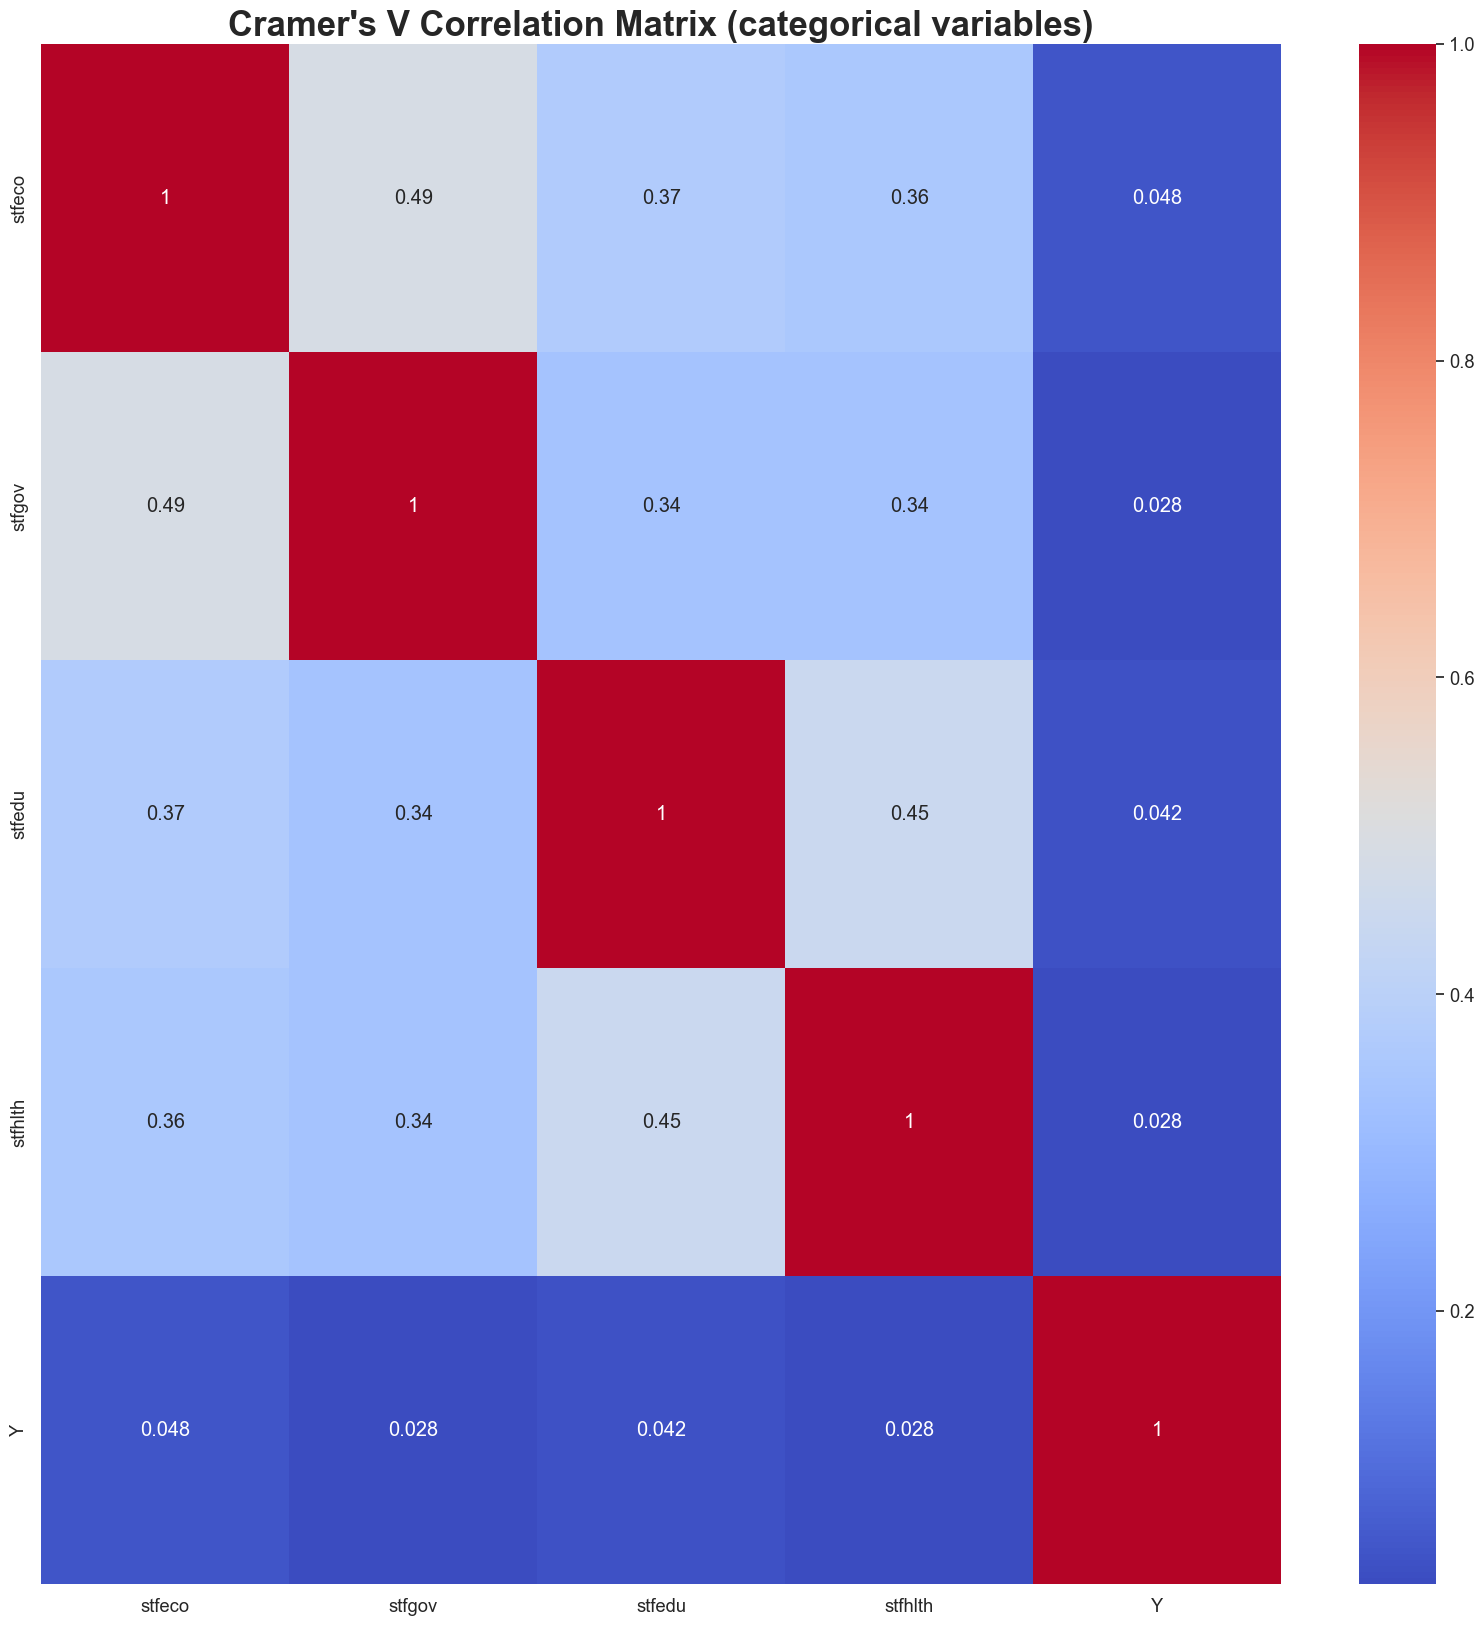

In [27]:
# Add this line at the beginning of your code
from IPython.display import FileLink
# from google.colab import files

columns_all =[]
for column in ess.columns:
  if ess[column].nunique() <5:
    columns_all.append(column)

import scipy.stats as ss

df_corr = ess[columns_all]
# Cramer's V for categorical correlations
def cramers_v(x, y):
    x = np.array(x)
    y = np.array(y)
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramersv = pd.DataFrame(index=df_corr.columns,columns=df_corr.columns)
columns = df_corr.columns

for i in range(0,len(columns)):
    for j in range(0,len(columns)):
        #print(data[columns[i]].tolist())
        u = cramers_v(df_corr[columns[i]].tolist(),df_corr[columns[j]].tolist())
        cramersv.loc[columns[i],columns[j]] = u
        
cramersv.fillna(value=np.nan,inplace=True)

Y_only = cramersv[['Y']]
new_Y = Y_only.sort_values(by=['Y'])

plt.figure(figsize=(20,20))
plt.title("Cramer's V Correlation Matrix (categorical variables)", fontsize =25, weight = 'bold')
ax = sns.heatmap(cramersv,cmap="coolwarm", annot = True )
plt.savefig("cat_corr.png")

# Use the fully qualified name for the download function
display(FileLink('cat_corr.png')) 
plt.show()


Check correlation importance by focusing on our target variable 'Y' in here:

/Users/sahilsingh/Documents/SAS-Multinomial-Logistic-Regression-Project/imp_corr.png

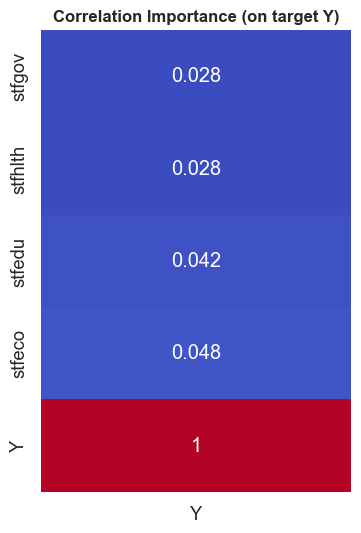

In [28]:
plt.figure(figsize=(4,6))
plt.title("Correlation Importance (on target Y)", fontsize =12, weight = 'bold')
sns.heatmap(new_Y, cmap="coolwarm", annot=True, cbar = False)
plt.savefig("imp_corr.png")
display(FileLink('imp_corr.png')) 